<a href="https://colab.research.google.com/github/Matviychuk22/Matviychuk22/blob/main/%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of training set images: (1080, 64, 64, 3)
Shape of training set labels: (1080,)
Shape of test set images: (120, 64, 64, 3)
Shape of test set labels: (120,)


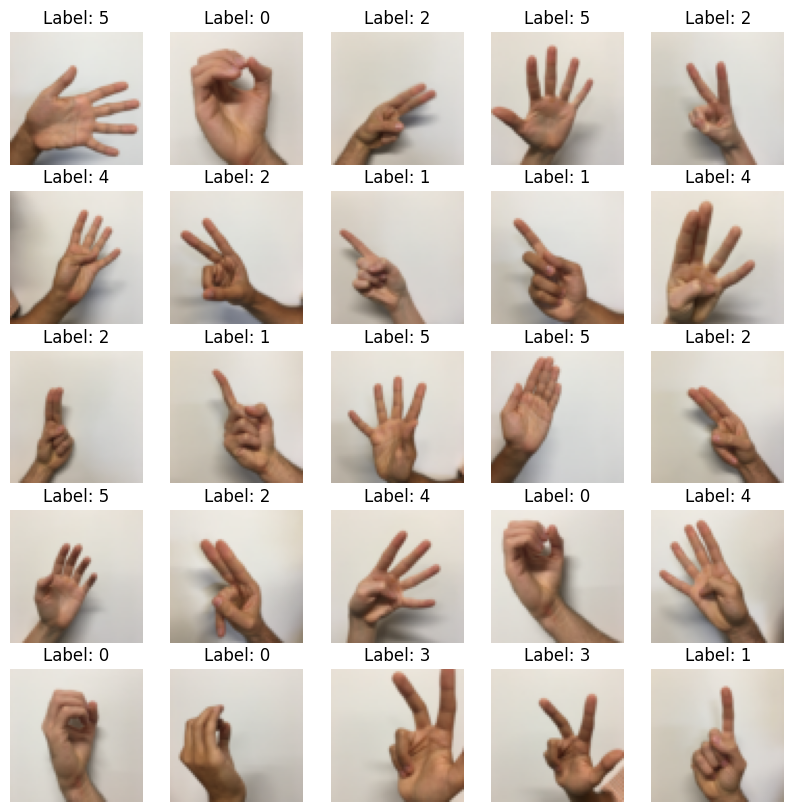

Accuracy of SVM classifier: 0.9416666666666667
 MLP with 1 layer: 0.9333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


 MLP with 2 layers: 0.4083333333333333
 MLP with 3 layers: 0.8416666666666667


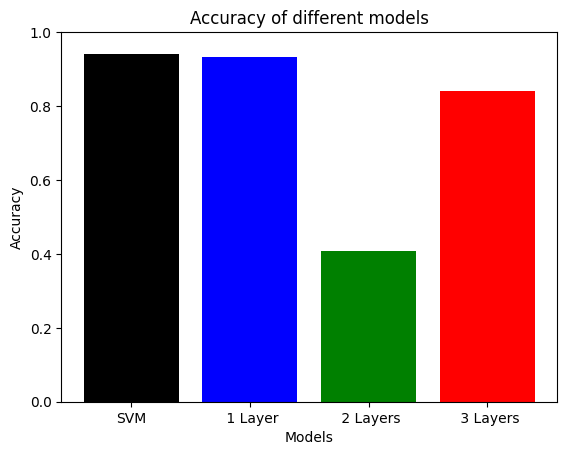

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train_dataset = h5py.File('train_signs.h5', "r")
test_dataset = h5py.File('test_signs.h5', "r")


X_train_orig = np.array(train_dataset["train_set_x"][:])
Y_train_orig = np.array(train_dataset["train_set_y"][:])
X_test_orig = np.array(test_dataset["test_set_x"][:])
Y_test_orig = np.array(test_dataset["test_set_y"][:])


print("Shape of training set images:", X_train_orig.shape)
print("Shape of training set labels:", Y_train_orig.shape)
print("Shape of test set images:", X_test_orig.shape)
print("Shape of test set labels:", Y_test_orig.shape)


plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train_orig[i])
    plt.title(f"Label: {Y_train_orig[i]}")
    plt.axis('off')
plt.show()


X_train = X_train_orig.reshape(X_train_orig.shape[0], -1) / 255.
X_test = X_test_orig.reshape(X_test_orig.shape[0], -1) / 255.


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm_classifier = SVC()
svm_classifier.fit(X_train, Y_train_orig)
svm_accuracy = accuracy_score(Y_test_orig, svm_classifier.predict(X_test))
print("Accuracy of SVM classifier:", svm_accuracy)

# Одношарова структура нейронної мережі
mlp1 = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='adam', max_iter=300)
mlp1.fit(X_train, Y_train_orig)
mlp1_accuracy = accuracy_score(Y_test_orig, mlp1.predict(X_test))
print(" MLP with 1 layer:", mlp1_accuracy)

# Двошарова структура нейронної мережі
mlp2 = MLPClassifier(hidden_layer_sizes=(3, 3), activation='logistic', solver='sgd', max_iter=300)
mlp2.fit(X_train, Y_train_orig)
mlp2_accuracy = accuracy_score(Y_test_orig, mlp2.predict(X_test))
print(" MLP with 2 layers:", mlp2_accuracy)

# Трьохшарова структура нейронної мережі
mlp3 = MLPClassifier(hidden_layer_sizes=(20, 7, 10), activation='relu', solver='adam', max_iter=300)
mlp3.fit(X_train, Y_train_orig)
mlp3_accuracy = accuracy_score(Y_test_orig, mlp3.predict(X_test))
print(" MLP with 3 layers:", mlp3_accuracy)


accuracies = [svm_accuracy, mlp1_accuracy, mlp2_accuracy, mlp3_accuracy]
models = ['SVM', ' 1 Layer', ' 2 Layers', ' 3 Layers']

plt.bar(models, accuracies, color=['black', 'blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of different models')
plt.ylim(0, 1)
plt.show()

